<a href="https://colab.research.google.com/github/Manohar0077/Variational-Auto-Encoder-on-MNIST/blob/master/Variational_Auto_Encoder_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load the FashionMNIST dataset (training and testing datasets)
train_dataset = datasets.MNIST(root='./data', download=True, transform=transform)

# Set batch size
batch_size = 32

# Create DataLoaders to load data in batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 34.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 8.90MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.88MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class VAEModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.common_fc = nn.Sequential(
        nn.Linear(28*28, 256),
        nn.Tanh(),
        nn.Linear(256, 64),
        nn.Tanh(),
        nn.Linear(64, 32),
    )
    self.mean_fc = nn.Sequential(
        nn.Linear(32, 16),
        nn.Tanh(),
        nn.Linear(16, 8)
    )
    self.std_fc = nn.Sequential(
        nn.Linear(32, 16),
        nn.Tanh(),
        nn.Linear(16, 8)
    )
    self.decoder_fc = nn.Sequential(
        nn.Linear(8, 16),
        nn.Tanh(),
        nn.Linear(16, 32),
        nn.Tanh(),
        nn.Linear(32, 64),
        nn.Tanh(),
        nn.Linear(64, 256),
        nn.Tanh(),
        nn.Linear(256, 28*28),
    )
  def encode(self, x):
    x = self.common_fc(x)
    mean = self.mean_fc(x)
    std = self.std_fc(x)
    return mean, std
  def decoder(self, z):
    x = self.decoder_fc(z)
    return x
  def reparametrization(self, mean, std):
    epsilon = torch.randn_like(std)
    z = mean + std * epsilon
    return z
  def forward(self, x):
    x = x.view(-1, 28*28)
    mean, std = self.encode(x)
    z = self.reparametrization(mean, std)
    x = self.decoder(z)
    return mean, std, x

In [ ]:
num_epochs = 10
learning_rate = 1e-3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = VAEModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [ ]:
for epoch in range(num_epochs):
    recon_losses = []
    kl_losses = []
    losses = []
    for (imgs, _) in tqdm(train_loader):
        imgs = imgs.view(-1, 28*28).to(device)
        optimizer.zero_grad()
        mean, std, output = model(imgs)
        mea = mean.to(device)
        std = std.to(device)
        output = output.to(device)
        recon_loss = criterion(output, imgs)
        kl_loss = -0.5 * torch.mean(1 + torch.log(std.pow(2)) - mean.pow(2) - std.pow(2))
        loss = recon_loss + 0.0001*kl_loss
        recon_losses.append(recon_loss.item())
        kl_losses.append(kl_loss.item())
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
    print("Epoch: {} | Recon Loss: {:.4f} | KL Loss: {:.4f} | Loss: {:.4f}".format(epoch+1, np.mean(recon_losses), np.mean(kl_losses), np.mean(losses)))

100%|██████████| 1875/1875 [00:36<00:00, 50.89it/s]


Epoch: 1 | Recon Loss: 0.2171 | KL Loss: 2.6108 | Loss: 0.2174


100%|██████████| 1875/1875 [00:36<00:00, 51.14it/s]


Epoch: 2 | Recon Loss: 0.1540 | KL Loss: 3.5589 | Loss: 0.1544


100%|██████████| 1875/1875 [00:39<00:00, 48.02it/s]


Epoch: 3 | Recon Loss: 0.1369 | KL Loss: 3.6505 | Loss: 0.1373


100%|██████████| 1875/1875 [00:37<00:00, 49.44it/s]


Epoch: 4 | Recon Loss: 0.1294 | KL Loss: 3.8666 | Loss: 0.1298


100%|██████████| 1875/1875 [00:38<00:00, 48.48it/s]


Epoch: 5 | Recon Loss: 0.1237 | KL Loss: 3.9657 | Loss: 0.1241


100%|██████████| 1875/1875 [00:38<00:00, 49.15it/s]


Epoch: 6 | Recon Loss: 0.1249 | KL Loss: 3.7704 | Loss: 0.1252


100%|██████████| 1875/1875 [00:37<00:00, 49.44it/s]


Epoch: 7 | Recon Loss: 0.1231 | KL Loss: 3.9088 | Loss: 0.1234


100%|██████████| 1875/1875 [00:38<00:00, 49.15it/s]


Epoch: 8 | Recon Loss: 0.1179 | KL Loss: 4.2322 | Loss: 0.1183


100%|██████████| 1875/1875 [00:38<00:00, 49.03it/s]


Epoch: 9 | Recon Loss: 0.1168 | KL Loss: 4.2541 | Loss: 0.1173


100%|██████████| 1875/1875 [00:38<00:00, 48.58it/s]

Epoch: 10 | Recon Loss: 0.1165 | KL Loss: 4.3195 | Loss: 0.1170


In [ ]:
model.eval()

VAEModel(
  (common_fc): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (mean_fc): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=8, bias=True)
  )
  (std_fc): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=8, bias=True)
  )
  (decoder_fc): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=256, bias=True)
    (7): Tanh()
    (8): Linear(in_features=256, out_features=784, bias=True)
  )
)

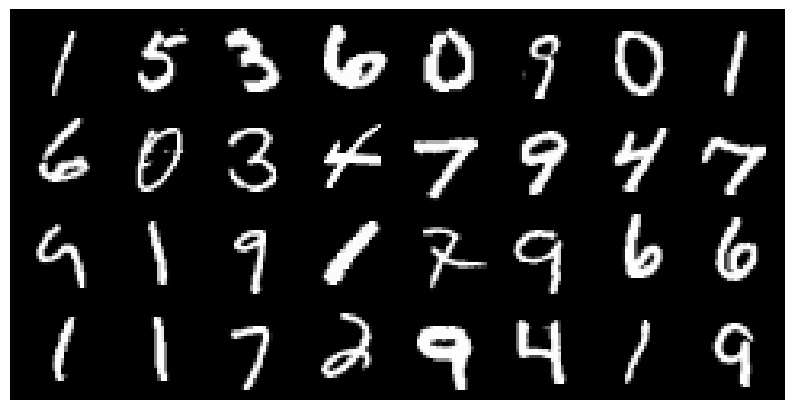

In [ ]:
images, labels = next(iter(train_loader))
imgs = images * 0.5 + 0.5
#imgs = imgs.numpy() * 255

# Convert images to a grid
grid_img = torchvision.utils.make_grid(imgs, nrow=8)  # nrow sets how many images per row

# Plot the grid of images
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(grid_img, (1, 2, 0)))  # Convert tensor to HWC for plt.imshow
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
#concat all bacthes of images to one tensor
images = []
labels = []
for (imgs, lab) in tqdm(train_loader):
  images.append(imgs)
  labels.append(lab)

100%|██████████| 1875/1875 [00:17<00:00, 105.41it/s]


In [ ]:
images = torch.cat(images, 0)
labels = torch.cat(labels, 0)

In [ ]:
mean, std, out = model(images.to(device))

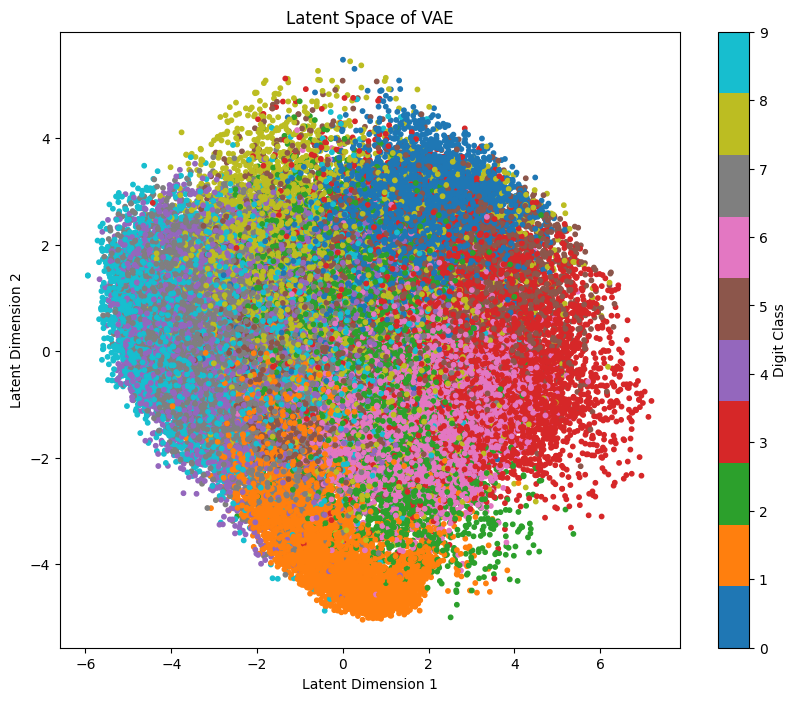

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
z = model.reparametrization(mean, std).detach().cpu()
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(z_pca[:, 0], z_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.colorbar(label="Digit Class")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space of VAE")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Assume `encoder` and `decoder` are already defined and trained
# Select two images and get their latent vectors
image_1 = images[10].to(device) # Select an image from your test set
image_2 = images[2].to(device)  # Select another image from your test set

# Get the latent vectors for both images (using the encoder)
z1_mean, _, _ = model(image_1.reshape(1, 28, 28, 1))  # Assuming MNIST (28x28)
z2_mean, _, _ = model(image_2.reshape(1, 28, 28, 1))

# Interpolation
num_steps = 30  # Number of interpolation steps
z_interp = np.zeros((num_steps, z1_mean.shape[1]))

with torch.no_grad():
# Linear interpolation between z1 and z2
  for i in range(num_steps):
      alpha = i / (num_steps - 1)
      z_interp[i] = (1 - alpha) * z1_mean.cpu() + alpha * z2_mean.cpu()

# Decode the interpolated latent vectors back into images
fig, ax = plt.subplots()
%matplotlib notebook
def update(i):
    # Decode the i-th latent vector from the interpolation
    decoded_image = model.decoder(torch.Tensor(z_interp[i:i+1]))
    ax.clear()  # Clear previous image
    ax.imshow(decoded_image.reshape(28, 28).detach().numpy(), cmap='gray')
    ax.set_title(f"Interpolation Step {i + 1}/{num_steps}")
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=num_steps, interval=100, repeat=False)
HTML(ani.to_jshtml())


<IPython.core.display.Javascript object>